In [1]:
%matplotlib inline  
%load_ext autoreload
%autoreload 2

In [2]:
from sim.netrual import Component, NLT_reserve, NLT_components  # noqa
from sim.data import get_batch_price
import pandas as pd


## Prepare market Data

In [3]:
target = ['EOS', 'OMG', 'ELF', 'BNB', 'INS', 'MANA', 'IOST', 'ARK']

In [4]:
market_prices = get_batch_price(target)
m = market_prices
m.head()

,EOS,timestamp,OMG,ELF,BNB,INS,MANA,IOST,ARK
0,9.513628,1517761800,12.220460,1.424711,8.588365,2.778753,0.101204,0.041005,4.420315
1,9.571649,1517762100,12.150611,1.428336,8.592760,2.767728,0.100280,0.040984,4.418087
2,9.503056,1517762400,12.242008,1.422520,8.572632,2.715798,0.098882,0.040767,4.403600
3,9.447612,1517762700,12.094019,1.414750,8.557670,2.718675,0.099569,0.040694,4.351696
4,9.428780,1517763000,12.042690,1.434984,8.546509,2.747469,0.098874,0.041125,4.343819


## Inital Components

In [49]:
_ = [Component(t) for t in market_prices.columns if t != 'timestamp']
NLT_components

{'ARK': 0.0 ARK => 8000 NTL,
 'BNB': 0.0 BNB => 8000 NTL,
 'ELF': 0.0 ELF => 8000 NTL,
 'EOS': 0.0 EOS => 8000 NTL,
 'INS': 0.0 INS => 8000 NTL,
 'IOST': 0.0 IOST => 8000 NTL,
 'MANA': 0.0 MANA => 8000 NTL,
 'OMG': 0.0 OMG => 8000 NTL}

## Warm-up with a Arbitrary Auction

In [50]:
import random

#### Set time to A Cycle before

In [51]:
begin = m.timestamp[0] - Component.auction_window -1

In [52]:
{k: v.minted for k, v in NLT_components.items()}

{'ARK': {},
 'BNB': {},
 'ELF': {},
 'EOS': {},
 'INS': {},
 'IOST': {},
 'MANA': {},
 'OMG': {}}

In [53]:
sender = 'satoshi'

for c in NLT_components.values():
    bid = float(random.randint(0, 100))
    print('bid %s' % bid)
    res = c(begin).auction(sender, random.randint(0, 100))
    print(res)

bid 66.0
True
bid 1.0
True
bid 74.0
True
bid 99.0
True
bid 87.0
True
bid 23.0
True
bid 82.0
True
bid 49.0
True


#### Check status of Auctions:

In [54]:
{k: v.minted for k, v in NLT_components.items()}

{'ARK': {0: {'bid': 66.0, 'sender': 'satoshi'}},
 'BNB': {0: {'bid': 85.0, 'sender': 'satoshi'}},
 'ELF': {0: {'bid': 51.0, 'sender': 'satoshi'}},
 'EOS': {0: {'bid': 5.0, 'sender': 'satoshi'}},
 'INS': {0: {'bid': 48.0, 'sender': 'satoshi'}},
 'IOST': {0: {'bid': 6.0, 'sender': 'satoshi'}},
 'MANA': {0: {'bid': 16.0, 'sender': 'satoshi'}},
 'OMG': {0: {'bid': 85.0, 'sender': 'satoshi'}}}

#### Time Jumps to Now:

In [55]:
[c(m.timestamp[0]) for c in NLT_components.values()]

EOS:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 9000}
OMG:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 10000}
ELF:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 11000}
BNB:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 12000}
INS:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 13000}
MANA:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 14000}
IOST:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 15000}
ARK:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 16000}


[5.0 EOS => 16000 NTL,
 85.0 OMG => 16000 NTL,
 51.0 ELF => 16000 NTL,
 85.0 BNB => 16000 NTL,
 48.0 INS => 16000 NTL,
 16.0 MANA => 16000 NTL,
 6.0 IOST => 16000 NTL,
 66.0 ARK => 16000 NTL]

### Calcu the Price of NLT

In [56]:
from sim.utils import nlt_value, highest, nlt_price

In [57]:
highest(m.T[0])

'OMG'

In [58]:
nlt_value(m.T[0])

1038.7391

In [59]:
price = nlt_price(m.T[0])
price

0.064921193749999995

### Find Tokens that Price is Lower than NLT



\begin{gather*}
Price_{NLT} > Price_{Token} \ | \ price_{token} \times NLT_{window} \le NLT_{min_bid}
\end{gather*}

In [60]:
from sim.utils import get_worth_to_auction
m_t = {k: v for k, v in m.T[0].items() if k != 'timestamp'}

In [61]:
worth = get_worth_to_auction(m_t)
worth

{'IOST': 0.04100515}

### Determin how many to Auction:



In [73]:
{k: price / v for k, v in worth.items()}

{'IOST': 1.5832448789969065}

In [63]:
from sim.utils import determin_auction_quantity, check_min_bid

In [64]:
determin_auction_quantity(m_t)

{'IOST': 474.9734636990719}

### Determin how many NLT to Redeem

\begin{gather*}
Price_{NLT} < Price_{Token}
\end{gather*}

In [65]:
from sim.utils import get_worth_to_redeem

In [74]:
get_worth_to_redeem(m_t)

{'ARK': 4.42031496,
 'BNB': 8.58836471,
 'ELF': 1.42471085,
 'EOS': 9.513628109999999,
 'INS': 2.7787532500000003,
 'IOST': 0.04100515,
 'MANA': 0.1012042,
 'OMG': 12.22046}

## Composed Simulation

In [5]:
from sim.utils import redeem_strategy, auction_strategy
from sim.simulator import sim_loop
import random

In [12]:
res = sim_loop(m)

inital bid 57.0
True
inital bid 39.0
True
inital bid 41.0
True
inital bid 99.0
True
inital bid 34.0
True
inital bid 100.0
True
inital bid 87.0
True
inital bid 27.0
True
{'EOS': 9.5136281099999991, 'timestamp': 1517761800.0, 'OMG': 12.220459999999999, 'ELF': 1.4247108500000001, 'BNB': 8.5883647100000005, 'INS': 2.7787532500000003, 'MANA': 0.10120419999999999, 'IOST': 0.041005149999999997, 'ARK': 4.4203149599999998}
PRICE OF NLT 0.0
EOS:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 9999.999437905459}
OMG:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 10999.999437905459}
ELF:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 11999.999437905459}
BNB:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 12999.999437905459}
INS:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 13999.999437905459}
MANA:: New cycle 1
Fo

Redeeming Current accounts {'satoshi': 23999.963632506566}, redeem 0.0003129605750317475 for satoshi
Redeem Finished Current accounts {'satoshi': 23999.96331954599}
{'redeemed': 0.0004646269382068865}
{'auctioned': False}
{'EOS': 8.9017720199999992, 'timestamp': 1517790600.0, 'OMG': 11.736816539999998, 'ELF': 1.3824483400000001, 'BNB': 8.4984392399999997, 'INS': 2.61919952, 'MANA': 0.095456760000000002, 'IOST': 0.040192320000000004, 'ARK': 4.2492196199999999}
PRICE OF NLT 0.0454802336023
EOS:: New cycle 9
OMG:: New cycle 9
ELF:: New cycle 9
BNB:: New cycle 9
INS:: New cycle 9
MANA:: New cycle 9
IOST:: New cycle 9
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 24999.96331954599}
ARK:: New cycle 9
1517790600.0 0.043661021589043766
plan to aucthon {}, plan to redeem {'IOST': 0.00030175072134457916} 
Redeeming Current accounts {'satoshi': 24999.96331954599}, redeem 0.00030175072134457916 for satoshi
Redeem Finished Current accounts {'satoshi': 24999.963017795268}
{'

{}
{}
{'EOS': 8.8080420000000004, 'timestamp': 1517823000.0, 'OMG': 11.221315499999999, 'ELF': 1.2877051199999998, 'BNB': 8.0117429999999992, 'INS': 2.40896664, 'MANA': 0.089311199999999993, 'IOST': 0.037348319999999997, 'ARK': 3.9359921999999994}
PRICE OF NLT 0.0347861373607
EOS:: New cycle 18
OMG:: New cycle 18
ELF:: New cycle 18
BNB:: New cycle 18
INS:: New cycle 18
MANA:: New cycle 18
IOST:: New cycle 18
ARK:: New cycle 18
1517823000.0 0.034786137360669565
plan to aucthon {}, plan to redeem {} 
{}
{}
{'EOS': 8.8044604799999995, 'timestamp': 1517823300.0, 'OMG': 11.161464239999999, 'ELF': 1.27950724, 'BNB': 7.9811736, 'INS': 2.3981667600000001, 'MANA': 0.088910799999999998, 'IOST': 0.037180879999999999, 'ARK': 3.8988398400000004}
PRICE OF NLT 0.0346005981383
1517823300.0 0.03460059813832356
plan to aucthon {}, plan to redeem {} 
{}
{}
{'EOS': 8.769838, 'timestamp': 1517823600.0, 'OMG': 11.071011159999999, 'ELF': 1.28557013, 'BNB': 7.9696407999999987, 'INS': 2.4152151399999999, 'MANA

{}
{}
{'EOS': 7.5502660000000006, 'timestamp': 1517854500.0, 'OMG': 9.3183000000000007, 'ELF': 1.0757208, 'BNB': 6.5639920000000007, 'INS': 1.9593486, 'MANA': 0.071947559999999994, 'IOST': 0.029337839999999997, 'ARK': 3.1731079999999996}
PRICE OF NLT 0.0288867792522
1517854500.0 0.028886779252212207
plan to aucthon {}, plan to redeem {} 
{}
{}
{'EOS': 7.5237589199999997, 'timestamp': 1517854800.0, 'OMG': 9.2637722399999998, 'ELF': 1.0581444499999999, 'BNB': 6.5933302799999991, 'INS': 1.9764948, 'MANA': 0.071281149999999988, 'IOST': 0.029066099999999997, 'ARK': 3.1580089199999999}
PRICE OF NLT 0.028717742908
1517854800.0 0.02871774290800375
plan to aucthon {}, plan to redeem {} 
{}
{}
{'EOS': 7.4679115499999993, 'timestamp': 1517855100.0, 'OMG': 9.2160298499999982, 'ELF': 1.0741225000000001, 'BNB': 6.5620180999999986, 'INS': 2.0063400000000002, 'MANA': 0.071654999999999996, 'IOST': 0.028802500000000002, 'ARK': 3.1855061500000001}
PRICE OF NLT 0.0285697412467
1517855100.0 0.0285697412466

{}
{}
{'EOS': 6.5334720000000006, 'timestamp': 1517885400.0, 'OMG': 8.3146824000000006, 'ELF': 0.95696007000000005, 'BNB': 6.1622519999999996, 'INS': 1.7183370600000001, 'MANA': 0.067311060000000006, 'IOST': 0.0254004, 'ARK': 2.834184}
PRICE OF NLT 0.0241645869183
1517885400.0 0.024164586918253846
plan to aucthon {}, plan to redeem {} 
{}
{}
{'EOS': 6.4529716200000005, 'timestamp': 1517885700.0, 'OMG': 8.1573384600000001, 'ELF': 0.94673600000000002, 'BNB': 6.0770457000000002, 'INS': 1.7101920000000002, 'MANA': 0.066360000000000002, 'IOST': 0.02528, 'ARK': 2.7876938999999998}
PRICE OF NLT 0.0237073053131
1517885700.0 0.023707305313103118
plan to aucthon {}, plan to redeem {} 
{}
{}
{'EOS': 6.3775119999999994, 'timestamp': 1517886000.0, 'OMG': 8.1825039999999998, 'ELF': 0.93537884999999998, 'BNB': 6.0583520000000002, 'INS': 1.6982364500000002, 'MANA': 0.065871750000000007, 'IOST': 0.025094000000000002, 'ARK': 2.832624}
PRICE OF NLT 0.0237804427884
1517886000.0 0.023780442788405215
plan t

{}
{}
{'EOS': 6.5088505000000003, 'timestamp': 1517916900.0, 'OMG': 8.3605114999999994, 'ELF': 0.96452300000000013, 'BNB': 6.1340079999999997, 'INS': 1.7123470000000001, 'MANA': 0.064949000000000007, 'IOST': 0.025493999999999999, 'ARK': 2.7415309999999997}
PRICE OF NLT 0.0242977779672
1517916900.0 0.02429777796717898
plan to aucthon {}, plan to redeem {} 
{}
{}
{'EOS': 6.4797250000000002, 'timestamp': 1517917200.0, 'OMG': 8.3262189999999983, 'ELF': 0.97338210000000014, 'BNB': 6.1052059999999999, 'INS': 1.74963902, 'MANA': 0.065504330000000013, 'IOST': 0.025711980000000002, 'ARK': 2.7448540000000001}
PRICE OF NLT 0.0241981152192
1517917200.0 0.024198115219159374
plan to aucthon {}, plan to redeem {} 
{}
{}
{'EOS': 6.5443111000000007, 'timestamp': 1517917500.0, 'OMG': 8.347822840000001, 'ELF': 0.98338320000000001, 'BNB': 6.1482241700000007, 'INS': 1.7676158399999999, 'MANA': 0.066795840000000009, 'IOST': 0.026594640000000003, 'ARK': 2.7695475600000004}
PRICE OF NLT 0.0242609014862
151791

{}
{}
{'EOS': 8.0651200000000003, 'timestamp': 1517946600.0, 'OMG': 10.704600000000001, 'ELF': 1.206944, 'BNB': 8.2733600000000003, 'INS': 2.23586376, 'MANA': 0.084486080000000019, 'IOST': 0.03168228, 'ARK': 3.6692799999999997}
PRICE OF NLT 0.0311102967836
1517946600.0 0.03111029678357169
plan to aucthon {}, plan to redeem {} 
{}
{}
{'EOS': 7.9771454999999998, 'timestamp': 1517946900.0, 'OMG': 10.59168794, 'ELF': 1.18614, 'BNB': 7.9922323000000004, 'INS': 2.222334, 'MANA': 0.082806000000000005, 'IOST': 0.032078000000000002, 'ARK': 3.6419535199999999}
PRICE OF NLT 0.0307821455498
1517946900.0 0.030782145549798873
plan to aucthon {}, plan to redeem {} 
{}
{}
{'EOS': 7.9187900000000004, 'timestamp': 1517947200.0, 'OMG': 10.557392000000002, 'ELF': 1.2035982000000001, 'BNB': 7.999358, 'INS': 2.2550434199999998, 'MANA': 0.084024780000000007, 'IOST': 0.032550140000000005, 'ARK': 3.6136239999999997}
PRICE OF NLT 0.0306824728043
1517947200.0 0.03068247280426224
plan to aucthon {}, plan to redee

{}
{}
{'EOS': 7.5773359999999998, 'timestamp': 1517977500.0, 'OMG': 10.273118999999999, 'ELF': 1.1289300000000002, 'BNB': 7.4680475000000008, 'INS': 2.0349779999999997, 'MANA': 0.07913400000000001, 'IOST': 0.031218000000000003, 'ARK': 3.4243730000000001}
PRICE OF NLT 0.0298563029896
1517977500.0 0.029856302989644562
plan to aucthon {}, plan to redeem {} 
{}
{}
{'EOS': 7.5772620000000002, 'timestamp': 1517977800.0, 'OMG': 10.256928, 'ELF': 1.1371755699999999, 'BNB': 7.4807040000000002, 'INS': 2.0657829699999999, 'MANA': 0.080331910000000006, 'IOST': 0.031690570000000001, 'ARK': 3.4397880000000001}
PRICE OF NLT 0.0298092478157
EOS:: New cycle 61
OMG:: New cycle 61
ELF:: New cycle 61
BNB:: New cycle 61
INS:: New cycle 61
MANA:: New cycle 61
IOST:: New cycle 61
ARK:: New cycle 61
1517977800.0 0.02980924781567984
plan to aucthon {}, plan to redeem {} 
{}
{}
{'EOS': 7.7347100500000003, 'timestamp': 1517978100.0, 'OMG': 10.391558999999999, 'ELF': 1.1371755699999999, 'BNB': 7.5401446900000009,

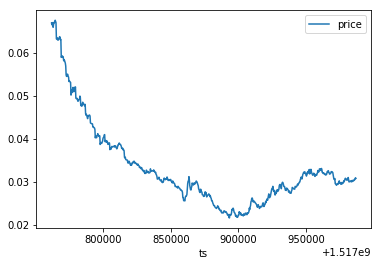

In [13]:
pd.DataFrame(res).plot(x='ts', y='price')

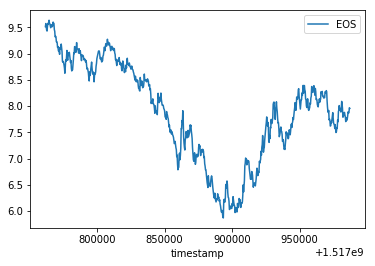

In [9]:
m.plot(x='timestamp', y='EOS')

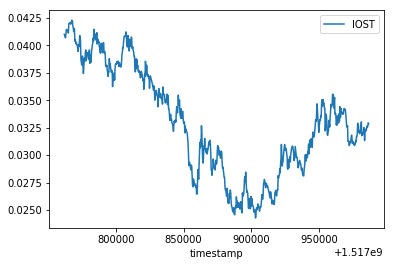

In [10]:
m.plot(x='timestamp', y='IOST')